In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv('rating_data', sep='\t', names=cols)

In [3]:
ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(ratings,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
df['title'].value_counts()

Star Wars (1977)                                             584
Contact (1997)                                               509
Fargo (1996)                                                 508
Return of the Jedi (1983)                                    507
Liar Liar (1997)                                             485
English Patient, The (1996)                                  481
Scream (1996)                                                478
Toy Story (1995)                                             452
Air Force One (1997)                                         431
Independence Day (ID4) (1996)                                429
Raiders of the Lost Ark (1981)                               420
Godfather, The (1972)                                        413
Pulp Fiction (1994)                                          394
Twelve Monkeys (1995)                                        392
Silence of the Lambs, The (1991)                             390
Jerry Maguire (1996)     

In [10]:
rating_details = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
rating_details.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
rating_details['# of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [13]:
rating_details.head()

,rating,# of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [14]:
rating_details = rating_details.reset_index()

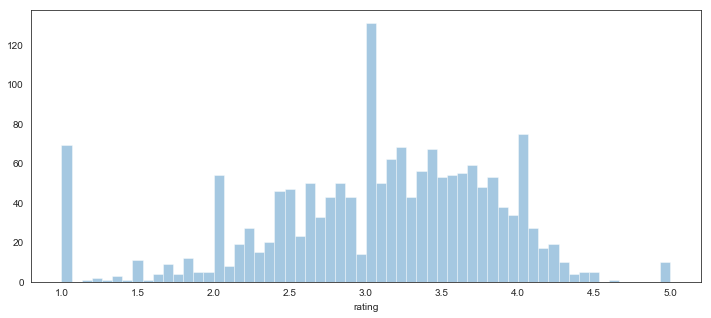

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(rating_details['rating'],bins=60,kde=False)

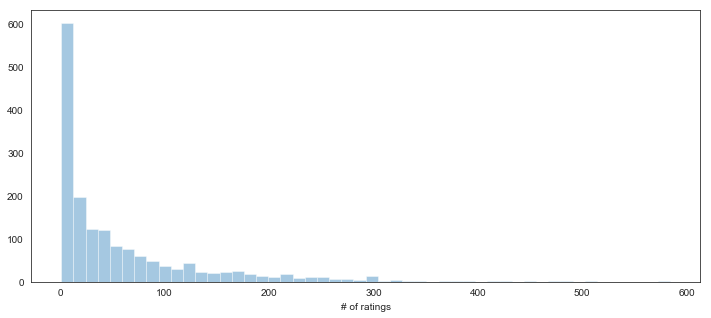

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(rating_details['# of ratings'],bins=50,kde=False)

In [19]:
df.head(2)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)


In [20]:
rating_details.head()

,title,rating,# of ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


In [21]:
df.shape , rating_details.shape

((100003, 5), (1664, 3))

In [22]:
df = df.merge(rating_details[['title','# of ratings']],on='title',how='left')

In [23]:
df.shape

(100003, 6)

In [24]:
df.head()

,user_id,item_id,rating,timestamp,title,# of ratings
0,0,50,5,881250949,Star Wars (1977),584
1,290,50,5,880473582,Star Wars (1977),584
2,79,50,4,891271545,Star Wars (1977),584
3,2,50,5,888552084,Star Wars (1977),584
4,8,50,5,879362124,Star Wars (1977),584


In [70]:
df = df[df['# of ratings']>50]
df.shape

(83622, 6)

In [73]:
movie_users=df.pivot_table(index='title',columns='user_id',values='rating').fillna(0)
movie_users.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Days in the Valley (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"20,000 Leagues Under the Sea (1954)",0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,4.0,0.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [74]:
from scipy.sparse import csr_matrix

movie_users_matrix = csr_matrix(movie_users.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_users_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [90]:
movie_users.loc[movie_users.index=='Star Wars (1977)'][0]

title
Star Wars (1977)    5.0
Name: 0, dtype: float64

In [96]:
movie = 'Star Wars (1977)'
features = movie_users.loc[movie_users.index==movie].values.reshape(1, -1)
distances, indices = model_knn.kneighbors(features, n_neighbors = 4)

In [97]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_users.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Star Wars (1977):

1: Return of the Jedi (1983), with distance of 0.11648183086402542:
2: Raiders of the Lost Ark (1981), with distance of 0.2359429772070084:
3: Empire Strikes Back, The (1980), with distance of 0.24955008270687218:
